# 영상: 엣지 추출 -> 흑백(binary)로 변환

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [36]:
def imshow(tit, image):
    plt.figure(figsize = (20,10))
    plt.title(tit)
    if len(image.shape)==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

# 1. cv2.threshold이용하여 binary 변환
## 1.1. 원본

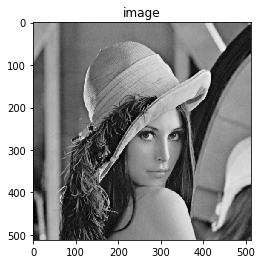

In [9]:
image = cv2.imread('./images/Lena.png', 0)
imshow('image', image)

## 1.2. binary 로 변환

In [11]:
thr, mask = cv2.threshold(src =image, 
                          thresh =127, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)


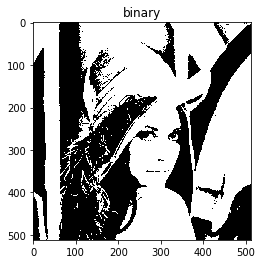

In [12]:
imshow('binary', mask)

## thresh  값을 어떻게 정할 것인가?가 문제



# 2. 노이즈 이미지를 threshold 적용하기
## 2.1. 원본 

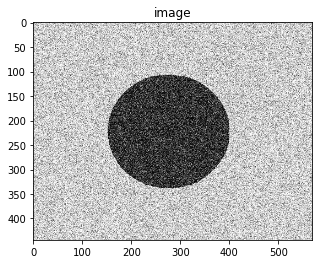

In [13]:
image = cv2.imread('./images/circle.png', 0)
imshow('image', image)

## 2.2. binary 로 변환

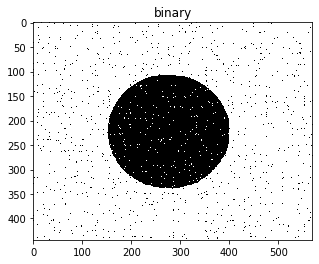

In [16]:
thr, mask = cv2.threshold(src =image, 
                          thresh =127, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
imshow('binary', mask)

- 전경은 잘 찾지만 배경의 노이즈가 남음

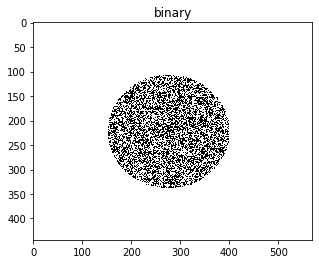

In [17]:
# thresghold = 50
thr, binary = cv2.threshold(src =image, 
                          thresh =50, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
imshow('binary', binary)

- 배경의 노이즈는 없어졌지만, 전경 이미지 정보가 날아감

## 3.3. 블러 적용 후 threshold 적용
> 평균을 이용하면
- 스무딩 효과
- 노이즈 제거 효과

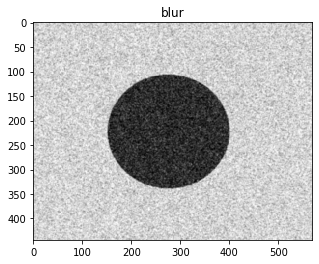

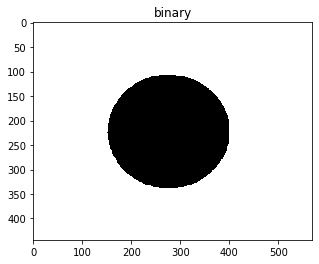

In [22]:
image = cv2.imread('./images/circle.png', 0)
img_blur = cv2.GaussianBlur(image, (5,5), 0)

# 역치,binary 결과 이미지 return
# thresh = 127
thr, binary = cv2.threshold(src =img_blur, 
                          thresh =127, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
imshow('blur', img_blur)
imshow('binary', binary)

- 원본 이미지에 노이즈가 있지만, 전경과 배경의 명암이 뚜렷한 이미지 이기 때문에 
- 역치 값을 대략 주어도, 이진화가 잘됨

# 3. 노이즈 이미지 연슴

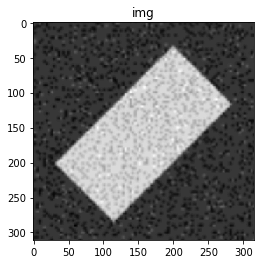

In [24]:
img = cv2.imread('./images/boxnoise.png', 0)
imshow('img', img)

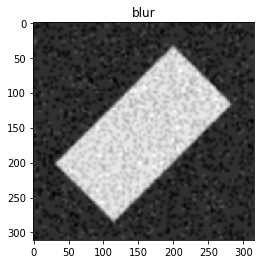

In [25]:
# blur
img_blur = cv2.GaussianBlur(img, (5,5), 0)
imshow('blur',img_blur)

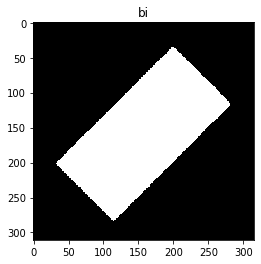

In [27]:
# threshold
thr, binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)

imshow('bi',binary)

- 원 본 이지미의 전경과 배경이 명암차가 확실하지 않으므로, threschold값을 정확히 찾아주어야 함.

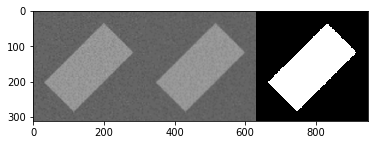

In [30]:
imshow('', np.hstack([img, img_blur, binary]))

# <font color = 'red'> 원, 네모 영상 비교</font>
> 메트릭스가 있다면
- 객관적으로 여러운영상인지, 쉬운 영상인지
- threshold를 결정하는 기준이 될 수 있음.

> 줄자의 역할: 히스토그램
- 히스토그램의 분포를 보고
- 명암대비가 큰 영상: 밝은 쪽, 어두운 쪽이 높고, 중간이 낮으면 binary로 구분하기 수월함.(낙타 등 모양이라면)
- 전경과 배경 사이의 거리가 넣으면(봉우리 사이 간격이 넓으면) 대충 threshold값을 넣어도 되지만
- 봉우리 사기가 좁다면 정확한 threshold값을 넣어줘야 함.
- 역치값을 자동으로 계산하는 알고리즘을 만들수도 있음.

> 역치값 구하는 알고리즘
- 쌍봉이 최대값 사이의 산술 평균
- 히스토그램의 가장 큰 값 2개를 뽑으면 한 봉우리에서 2개를 찾을수도 있음.
- 전체 분포를 가우시안 2개로 표현해서 찾을 수 있음.->**Gaussian Mixture Model, GMM**


> 전경과 배경이 합쳐져있는 영상(구분이 잘 안되는 영상)
- 두 개의 가우시안 그래프가 겹쳐져있을 대
- 겹쳐지는 부분이 오류가 나타날 확률이 됨.



# 4. 역치값을 찾는 알고리즘 이용: cv2.THRESH_OTSU

- 전경과 배경을 나누는 threshold값을 찾아줄께

In [31]:
image = cv2.imread('./images/boxnoise.png', 0)
img_blur = cv2.GaussianBlur(image, (5,5), 0)

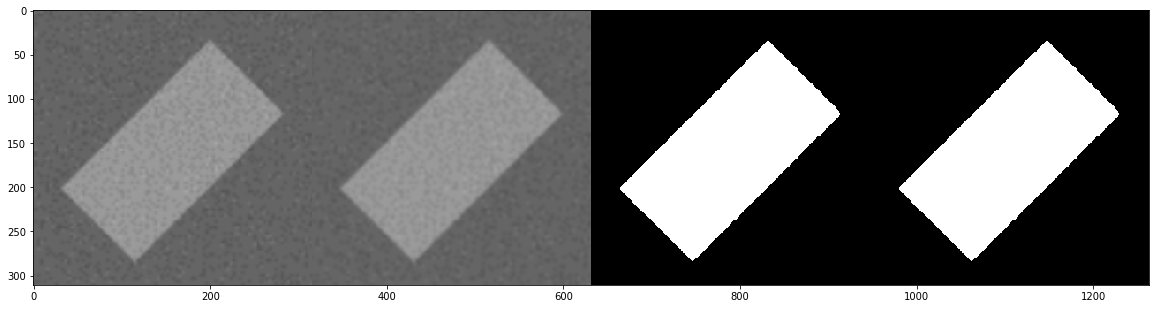

In [37]:
thr, binary1 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thr, binary2 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('', np.hstack([img, img_blur, binary1, binary2]))


## 4.1. 연습

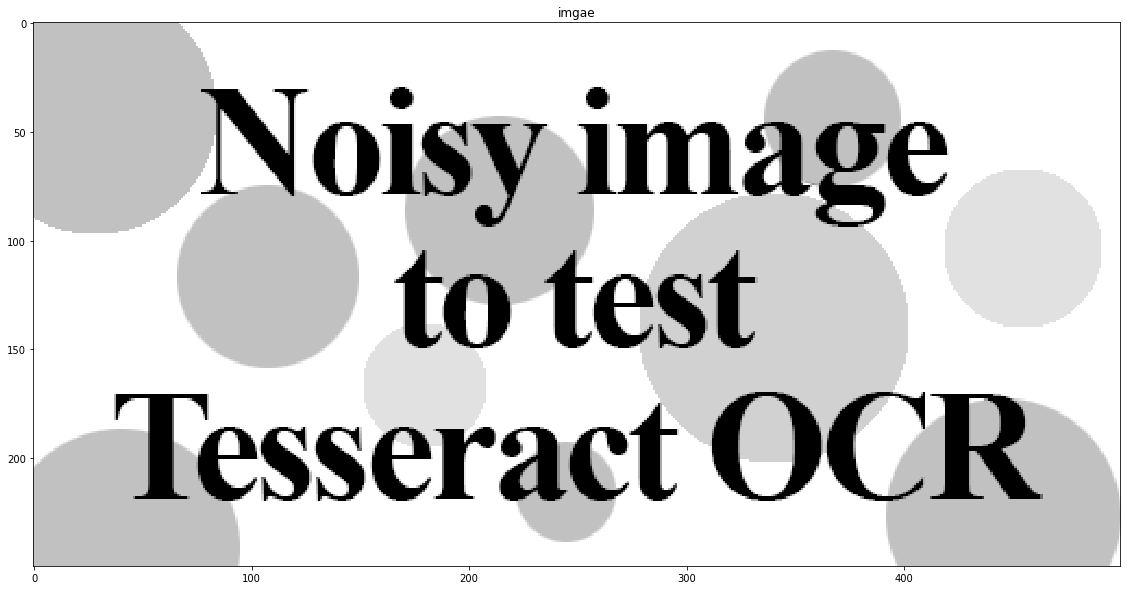

In [40]:
image = cv2.imread('./images/example_01.png', 0)
imshow('imgae', image)

(array([1.4415e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 6.5000e+01, 0.0000e+00, 0.0000e+00, 3.7000e+01,
        0.0000e+00, 0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4200e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.1000e+01, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.8000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2000e+01,
        1.5800e+02, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5000e+01, 0.0000e+00, 0.0000e+00, 0.00

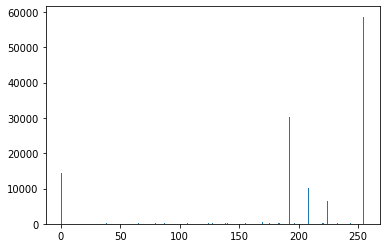

In [47]:
plt.hist(image.ravel(), 256, (0,256))

In [48]:
img_blur = cv2.GaussianBlur(image, (5,5), 0)

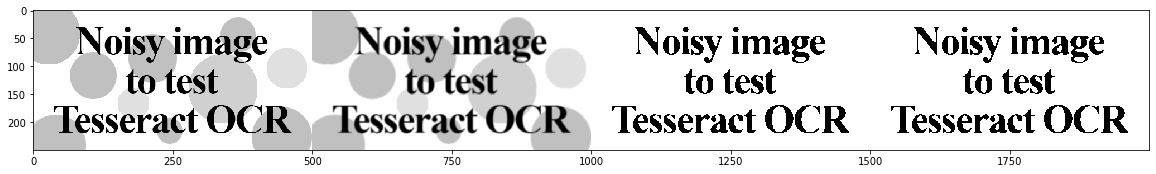

In [50]:
thr, binary1 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thr, binary2 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('', np.hstack([image, img_blur, binary1, binary2]))



## 4.2. 연습

In [64]:
image = cv2.imread('./images/ocr.jpg', 0)

(array([2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        8.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 9.000e+00,
        7.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
        4.000e+00, 7.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 8.000e+00,
        5.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 1.200e+01, 9.000e+00,
        6.000e+00, 9.000e+00, 1.000e+0

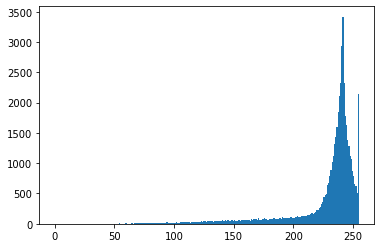

In [65]:
plt.hist(image.ravel(), 256, (0, 255))

In [66]:
img_blur = cv2.GaussianBlur(image, (5,5), 0)

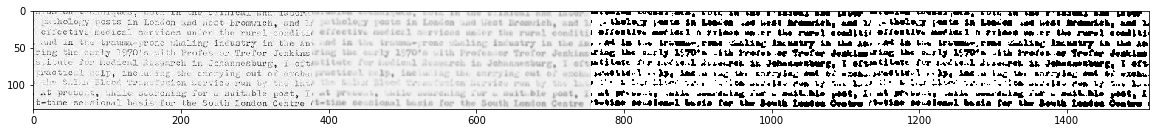

In [70]:
thr, binary1 = cv2.threshold(src =img_blur, 
                          thresh =220, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
thr, binary2 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('', np.hstack([image, img_blur, binary1, binary2]))


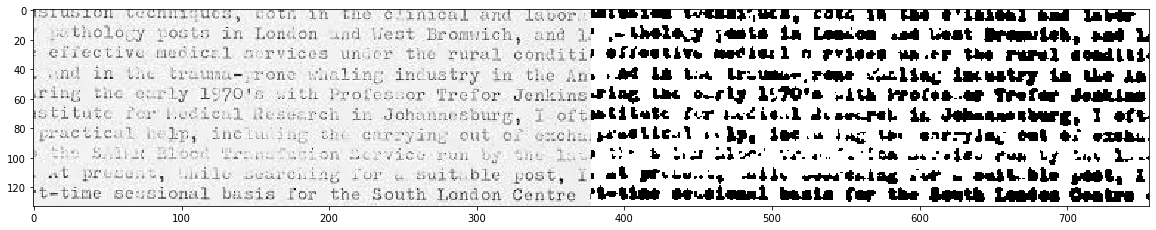

In [57]:
imshow('', np.hstack([image, binary1]))


# 5. threshole값을 다르게 적용하기
- global한 값 하나만 사용하니 문제 해결이 안됨.
- 밝은 부분에 해당하는 threshold, 어두운 부분에 해당하는 threshold값 사용하기

## 5.1. global한 값 1개만 사용하기

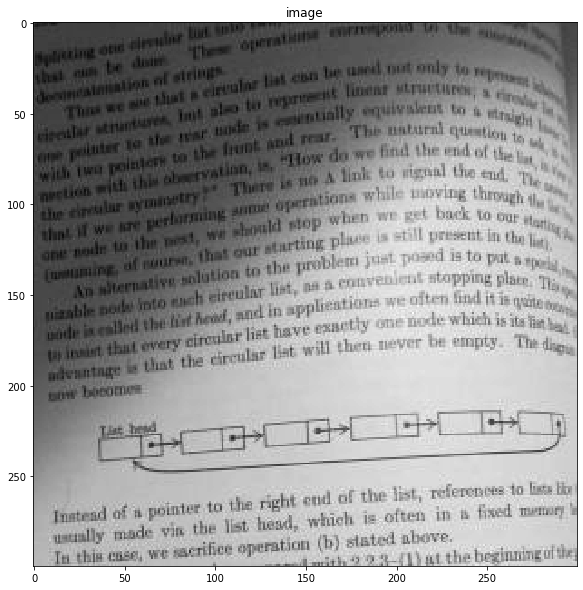

In [72]:
image = cv2.imread('./images/text.jpg', 0)
imshow('image', image)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.600e+01, 1.300e+01,
        3.000e+01, 2.500e+01, 4.500e+01, 5.300e+01, 7.000e+01, 8.500e+01,
        9.200e+01, 1.000e+02, 1.430e+02, 1.690e+02, 1.930e+02, 1.900e+02,
        2.090e+02, 2.320e+02, 2.460e+02, 2.640e+02, 3.030e+02, 3.020e+02,
        3.380e+02, 3.660e+02, 3.240e+02, 4.040e+02, 4.100e+02, 4.480e+02,
        4.700e+02, 5.030e+02, 4.730e+02, 5.100e+02, 5.720e+02, 6.800e+02,
        8.270e+02, 1.107e+03, 1.212e+03, 1.139e+03, 1.169e+03, 1.303e+03,
        1.315e+03, 1.325e+03, 1.165e+03, 1.045e+03, 9.410e+02, 8.240e+02,
        7.680e+02, 7.400e+02, 6.290e+02, 6.990e+02, 5.440e+02, 5.240e+02,
        5.280e+02, 5.290e+02, 5.140e+02, 4.900e+02, 4.890e+02, 4.640e+02,
        4.700e+02, 4.790e+02, 5.290e+02, 5.440e+02, 5.030e+02, 4.570e+02,
        4.440e+02, 4.770e+02, 4.520e+0

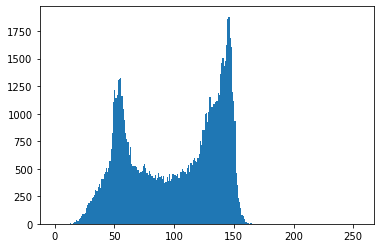

In [73]:
plt.hist(image.ravel(), 256, (0, 255))

In [74]:
img_blur = cv2.GaussianBlur(image, (5,5), 0)

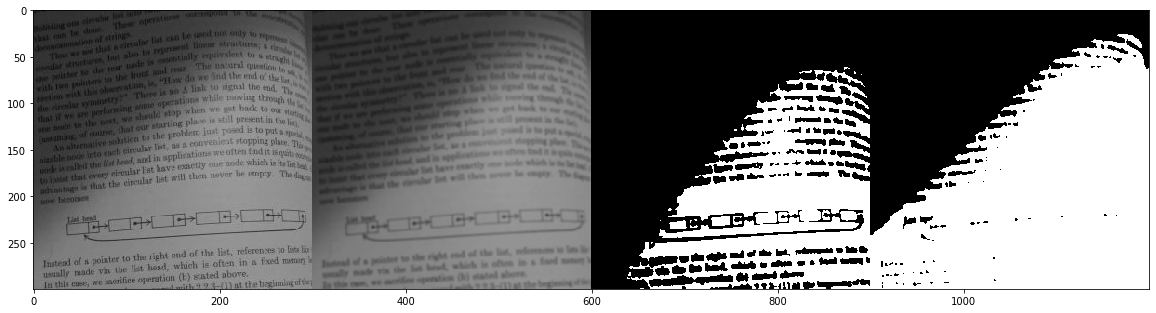

In [75]:
thr, binary1 = cv2.threshold(src =img_blur, 
                          thresh =127, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
thr, binary2 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('', np.hstack([image, img_blur, binary1, binary2]))


- ots알고리즘으로 해도 풀 수 없음.

## 5.2. adaptive threshole로 구현
- 이미지를 블록 단위로 분할해서 threshold값 구하기

#### 파라미터
> block size
- 만약 100 * 100 이미지라면
- 50 -> 이미지를 4등분해서 보겠다는 의미

> C
- threshole값을 기준으로해서 얼마를 더 뺄지
- 블록으로 설정한 부분의 평균보다 작으면 배경, 크면 전경
- 평균을 보겠다는 것은 가우시안 분포를 사용하겠다는 것이고
- C값: 평균보다 높일지, 낮출지를 결정하는 가중치
- 만약 평균값이 70이라면, C= 5라면 평균을 65로 보겠다
- 평균값이 이상값일 수 있으니, 평균값을 조금 조절하겠다는 의미
- C 가 +값이면 평균을 조금 낮추겠다
- C가 -값이면 평균을 조금 높이겠다.
- 별 지식이 없으면 그냥 0으로 주면 돔.

> thresholdType
- 평균을 구하는 방법: 2가지
- 산술평균: 값 * 1/n을 곱해서 더하기
- 가우시안 평균: 평균에 가까울수록 가중치를 크게 해서 곱해서 더하기
- 거리에 따라서 가중치를 다르게 해서 곱해서 더하기
- 일반적으로 산술평균보다는 가우시안 평균이 성능이 더 좋음.


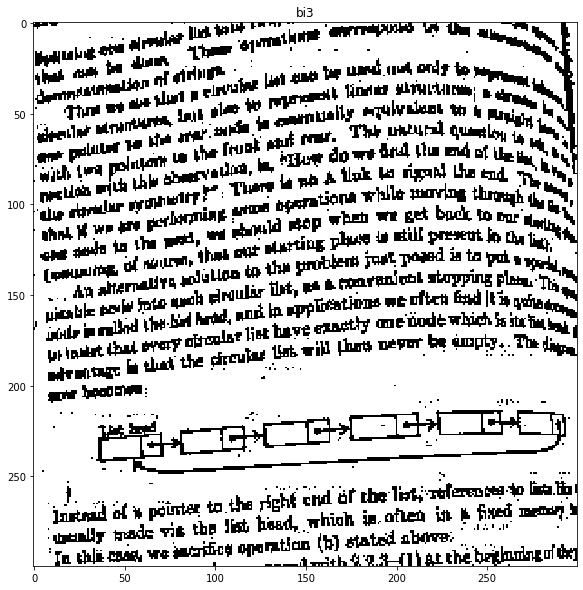

In [85]:
image = cv2.imread('./images/text.jpg', 0)

img_blur = cv2.GaussianBlur(image, (5,5), 0)

thr, binary1 = cv2.threshold(src =img_blur, 
                          thresh =127, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
thr, binary2 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary3 = cv2.adaptiveThreshold(src=image, 
                                maxValue=255,
                               adaptiveMethod =cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               thresholdType =cv2.THRESH_BINARY,
                               blockSize =21,  # 주변 픽셀
                               C =3)
imshow('bi3', binary3)

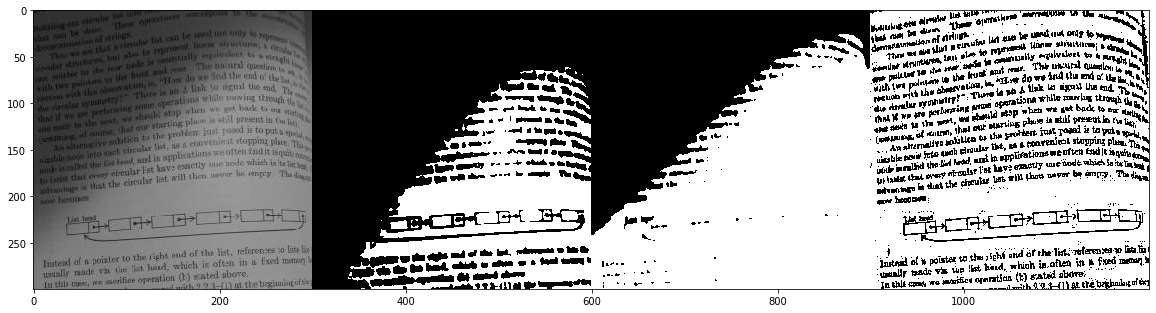

In [86]:
imshow('', np.hstack([image, binary1, binary2, binary3]))

## 5.3. 연습

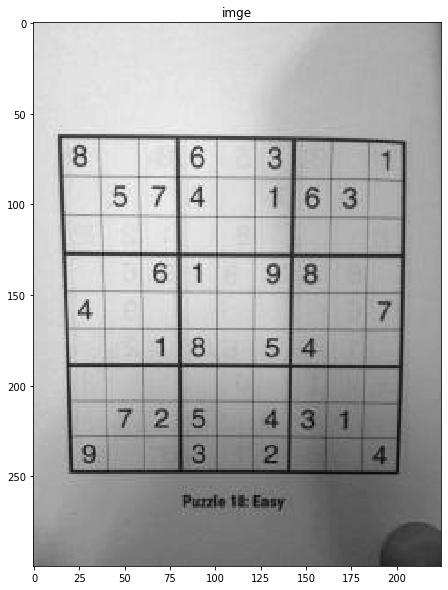

In [88]:
image = cv2.imread('./images/grid.jpg', 0)
imshow('imge',image)

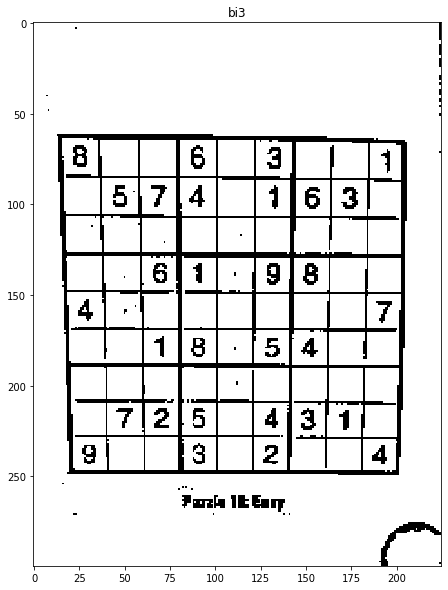

In [105]:
img_blur = cv2.GaussianBlur(image, (5,5), 0)

thr, binary1 = cv2.threshold(src =img_blur, 
                          thresh =80, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
thr, binary2 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary3 = cv2.adaptiveThreshold(src=image, 
                                maxValue=255,
                               adaptiveMethod =cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               thresholdType =cv2.THRESH_BINARY,
                               blockSize =21,  # 주변 픽셀
                               C =4)
imshow('bi3',binary3)

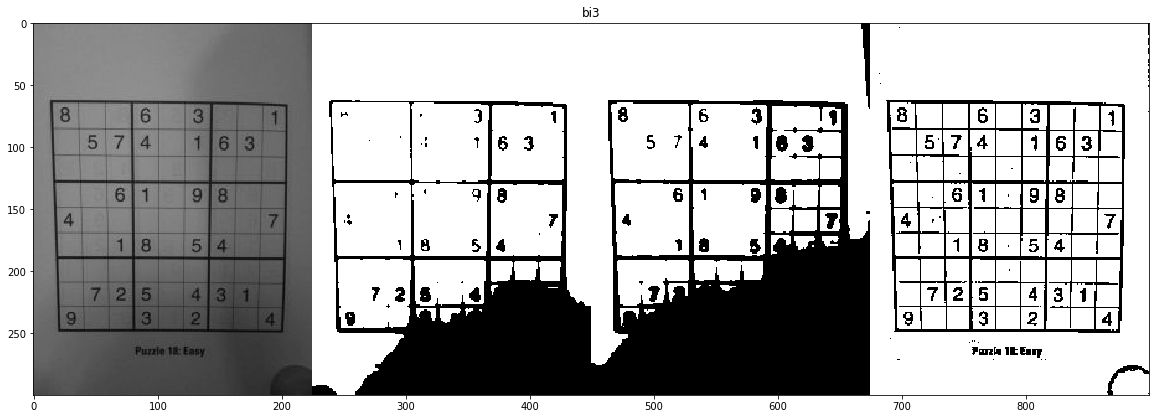

In [106]:
imshow('bi3',np.hstack([image, binary1, binary2, binary3]))

# 5.4. 영수증 연습

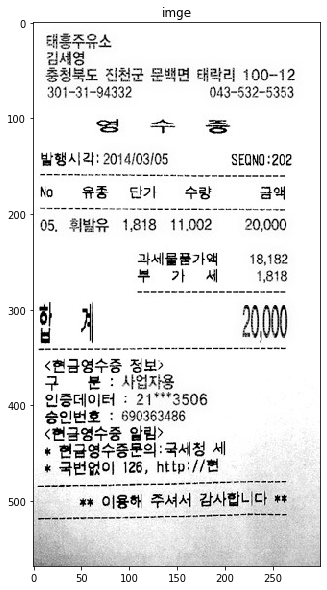

In [107]:
image = cv2.imread('./images/bill.jpg', 0)
imshow('imge',image)

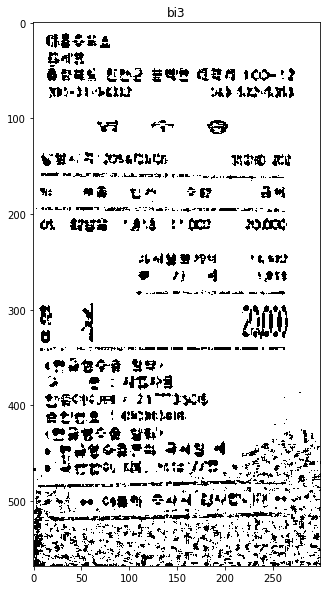

In [132]:
img_gauss_blur = cv2.GaussianBlur(image, (5,5), 0)
img_median_blur = cv2.medianBlur(image, 5)

thr, binary1 = cv2.threshold(src =img_blur, 
                          thresh =80, 
                          maxval =255, 
                          type =cv2.THRESH_BINARY)
thr, binary2 = cv2.threshold(src =img_blur, 
                          thresh =0, # 의미없는 값 넣기, 상관없음 
                          maxval =255, 
                          type =cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary3 = cv2.adaptiveThreshold(src=img_median_blur, 
                                maxValue=255,
                               adaptiveMethod =cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               thresholdType =cv2.THRESH_BINARY,
                               blockSize =15,  # 주변 픽셀
                               C =2)
imshow('bi3',binary3)

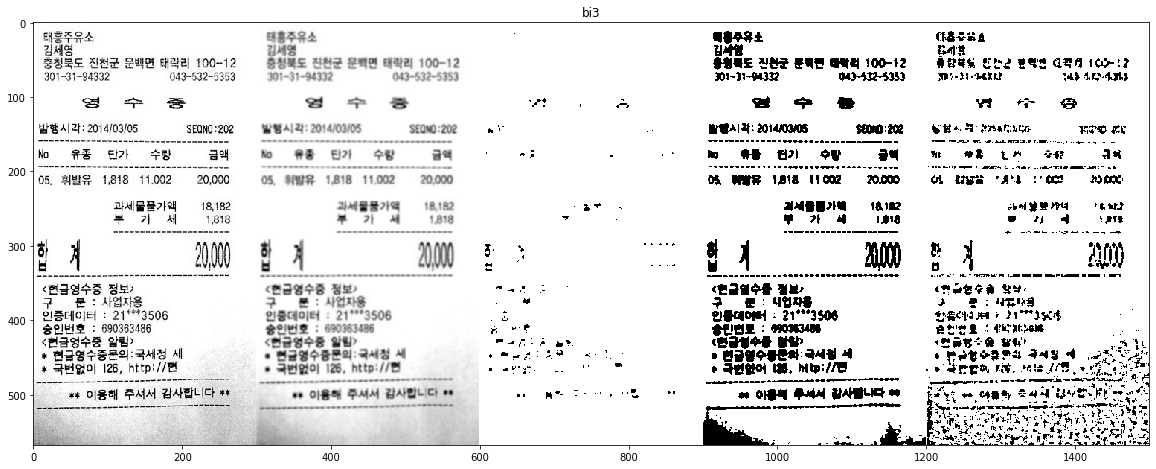

In [133]:
imshow('bi3',np.hstack([image,img_blur, binary1, binary2, binary3]))